## 1- Is your nearest neighbor close to you in high-dimensional space?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Data Generation

In [ ]:
def random_points(num_points, num_dimensions):
  points = np.random.normal(0, 1, size=(num_points, num_dimensions))
  return points

In [ ]:
'''
num_points = 10 # It represents the number of points
num_dimensions = 7 # It represents the dimension
points = random_points(num_points, num_dimensions)
print("*** CHECK FOR DATA GENERATION FUNCTION ***\n")
print(points, "\n")
print("*** ---------------------------------- ***")
'''

'\nnum_points = 10 # It represents the number of points\nnum_dimensions = 7 # It represents the dimension\npoints = random_points(num_points, num_dimensions)\nprint("*** CHECK FOR DATA GENERATION FUNCTION ***\n")\nprint(points, "\n")\nprint("*** ---------------------------------- ***")\n'

### 1.2 Distance Calculation


In [ ]:
def distance(point1, point2): # It measures the distance by using euclidean algorithm
  # Distance = Square Root of (point1 - point2)^2 for every element in the dimension
  difference_between_points = (point1 - point2)
  square_of_points = difference_between_points ** 2
  sum_of_squares = np.sum(square_of_points)
  #print(type(sum_of_squares),sum_of_squares)
  return np.sqrt(sum_of_squares)


In [ ]:
'''
print("*** CHECK FOR DATA DISTANCE CALCULATION FUNCTION ***\n")
distance_example = distance(points[0], points[1]) # It simply takes the distance measue between point 1 and point 2
print(distance_example, "\n")
print("*** ---------------------------------- ***")
'''

'\nprint("*** CHECK FOR DATA DISTANCE CALCULATION FUNCTION ***\n")\ndistance_example = distance(points[0], points[1]) # It simply takes the distance measue between point 1 and point 2\nprint(distance_example, "\n")\nprint("*** ---------------------------------- ***")\n'

### 1.3 Average Distance of A Selected Point


In [ ]:
def average_distance_sp(points, selected_point): # It takes the all points except the selected point and sends points to the distance func.
  sum_of_distance = 0
  points_pair_number = 0
  distances = []
  for index in range(len(points)):
    if not np.array_equal(points[index], selected_point): # It checks point is not the same as the selected point so the 0 is eliminated from the calculation
      distance_between_points = distance(points[index], selected_point)
      sum_of_distance += distance_between_points
      points_pair_number += 1 # It also counts the points that are not same with selected point
      distances.append(distance_between_points)
  average_distance_val = sum_of_distance / points_pair_number if points_pair_number else 0 # Takes average
  return average_distance_val


In [ ]:
'''
avg_dist, distance_list = average_distance_sp(points, points[1]) # It is just an example
print("*** CHECK FOR AVERAGE DISTANCE SP FUNC ***\n")
print("Average distance for selected point: ", avg_dist, "\n")
print("All distance for selected point: ", distance_list, "\n")
print("*** ---------------------------------- ***")
'''

'\navg_dist, distance_list = average_distance_sp(points, points[1]) # It is just an example\nprint("*** CHECK FOR AVERAGE DISTANCE SP FUNC ***\n")\nprint("Average distance for selected point: ", avg_dist, "\n")\nprint("All distance for selected point: ", distance_list, "\n")\nprint("*** ---------------------------------- ***")\n'

### 1.4 Minimum Distance


In [ ]:
def minimum_distance(points, selected_point): # It stores all the distance from selected point to other points (except selected point)
  distances = []
  for index in range(len(points)):
    if not np.array_equal(points[index], selected_point): # It prevents the measure distance with the selected point it prevents the distance = 0 condition
      distance_between_points = distance(points[index], selected_point)
      #print(f"Distance calculation result: {distance_between_points}, type: {type(distance_between_points)}")
      distances.append(distance_between_points)


  return min(distances) if distances else float('inf')

In [ ]:
#min_dist = minimum_distance(points, points[1])

In [ ]:
'''
print("*** CHECK FOR MINIMUM DISTANCE FUNC ***\n")
print("Minimum Distance from selected point: ", min_dist, "\n")
print("*** ---------------------------------- ***")
'''

'\nprint("*** CHECK FOR MINIMUM DISTANCE FUNC ***\n")\nprint("Minimum Distance from selected point: ", min_dist, "\n")\nprint("*** ---------------------------------- ***")\n'

### 1.5 Closest-to-Avearege Ratio


In [ ]:
def closest_to_average_ratio(min_dist, avg_dist):
  return min_dist/avg_dist

In [ ]:
'''
print("*** CHECK FOR CLOSEST_TO_AVERAGE_RATIO FUNC ***\n")
print("Min_dist / avg_dist: ", closest_to_average_ratio(min_dist,avg_dist), "\n")
print("*** ---------------------------------- ***")
'''

'\nprint("*** CHECK FOR CLOSEST_TO_AVERAGE_RATIO FUNC ***\n")\nprint("Min_dist / avg_dist: ", closest_to_average_ratio(min_dist,avg_dist), "\n")\nprint("*** ---------------------------------- ***")\n'

### 1.6 Experimentation and Visualization

#### 1.6.a Generating 1000 points with dimensions = 1,...,100

In [ ]:
def generate_multi_dimensional_data():
  num_points = 1000
  num_dimensions = 1
  all_points = []

  while num_dimensions != 101:
    all_points.append(random_points(num_points, num_dimensions))
    num_dimensions += 1

  return all_points

In [ ]:
all_points = generate_multi_dimensional_data()
iter = 1
for ar in all_points:
  print(iter, "dimesion points", ar)
  iter += 1


In [ ]:
A_d_average_distance = [] # It stores average distances for the selected points. Every single element is for the specified points and dimensions, it can be splitted 100's every 100 integer represents the one dimension
A_d_minimum_distance = [] # It stores minimum distances for the selected points. It can also splitted as previous one.
A_d_closest_to_average_ratio_distance = [] # It stores closest_to_average_ratio_distance  for the selected points. It can also splitted as previous one.
for i in range(0,100):
  s_d = all_points[i] # It takes all points for specified dimensions i represents dimensions
  #print(s_d)
  unique_integers = np.random.choice(range(0, 1000), size=100, replace=False) # generating random values
  for random_val in unique_integers:
    random_point = s_d[random_val] # It takes random points
    #print(random_point)
    avg_dist = average_distance_sp(s_d, random_point) # It measures avg distance from the random_point to other points excluding the random_point
    #print(type(avg_dist), avg_dist)
    A_d_average_distance.append(avg_dist)
    min_dist = minimum_distance(s_d, random_point)
    #print( min_dist)
    A_d_minimum_distance.append(min_dist)
    ratio = closest_to_average_ratio(min_dist, avg_dist)
    A_d_closest_to_average_ratio_distance.append(ratio)



In [ ]:
print(len(A_d_average_distance))
print(len(A_d_minimum_distance))
print(len(A_d_closest_to_average_ratio_distance))

10000
10000
10000


In [ ]:
iter = 0
mean_of_A_d_dimension = []
std_of_A_d_dimension = []
mean_of_average_distance = [] # Every element represents the mean of the specific dimension for instance [0] represents 1D random points means for average distances [1] represents 2D random points means for average distances etc.
mean_of_minimum_distance = []
mean_of_closest_to_average_ratio_distance = []
std_of_average_distance = []
std_of_minimum_distance = []
std_of_closest_to_average_ratio_distance = []
while iter != 100:

  #---------------------------------------------------#
  temp_average_distance = A_d_average_distance[iter*100 : iter*100 + 100] # It takes every 100 element in the specified dimension. For first iteration it will take 0 to 99 element. For second iteration 100 to 199 (both including).
  mean_average_distance = np.mean(temp_average_distance) # np.mean and np.std is used for std mean calculation.
  std_average_distance = np.std(temp_average_distance)
  mean_of_average_distance.append(mean_average_distance)
  std_of_average_distance.append(std_average_distance)
  #---------------------------------------------------#
  temp_minimum_distance = A_d_minimum_distance[iter*100 : iter*100 + 100]
  mean_minimum_distance = np.mean(temp_minimum_distance)
  std_minimum_distance = np.std(temp_minimum_distance)
  mean_of_minimum_distance.append(mean_minimum_distance)
  std_of_minimum_distance.append(std_minimum_distance)
  #---------------------------------------------------#
  temp_closest_to_average_ratio_distance = A_d_closest_to_average_ratio_distance[iter*100 : iter*100 + 100]
  mean_closest_to_average_ratio_distance = np.mean(temp_closest_to_average_ratio_distance)
  std_closest_to_average_ratio_distance = np.std(temp_closest_to_average_ratio_distance)
  mean_of_closest_to_average_ratio_distance.append(mean_closest_to_average_ratio_distance)
  std_of_closest_to_average_ratio_distance.append(std_closest_to_average_ratio_distance)
  #---------------------------------------------------#

  iter += 1

In [ ]:
print(len(mean_of_average_distance))
print(len(mean_of_minimum_distance))
print(len(mean_of_closest_to_average_ratio_distance))
print(len(std_of_average_distance))
print(len(std_of_minimum_distance))
print(len(std_of_closest_to_average_ratio_distance))

100
100
100
100
100
100


#### 1.6.b Visualization of Data

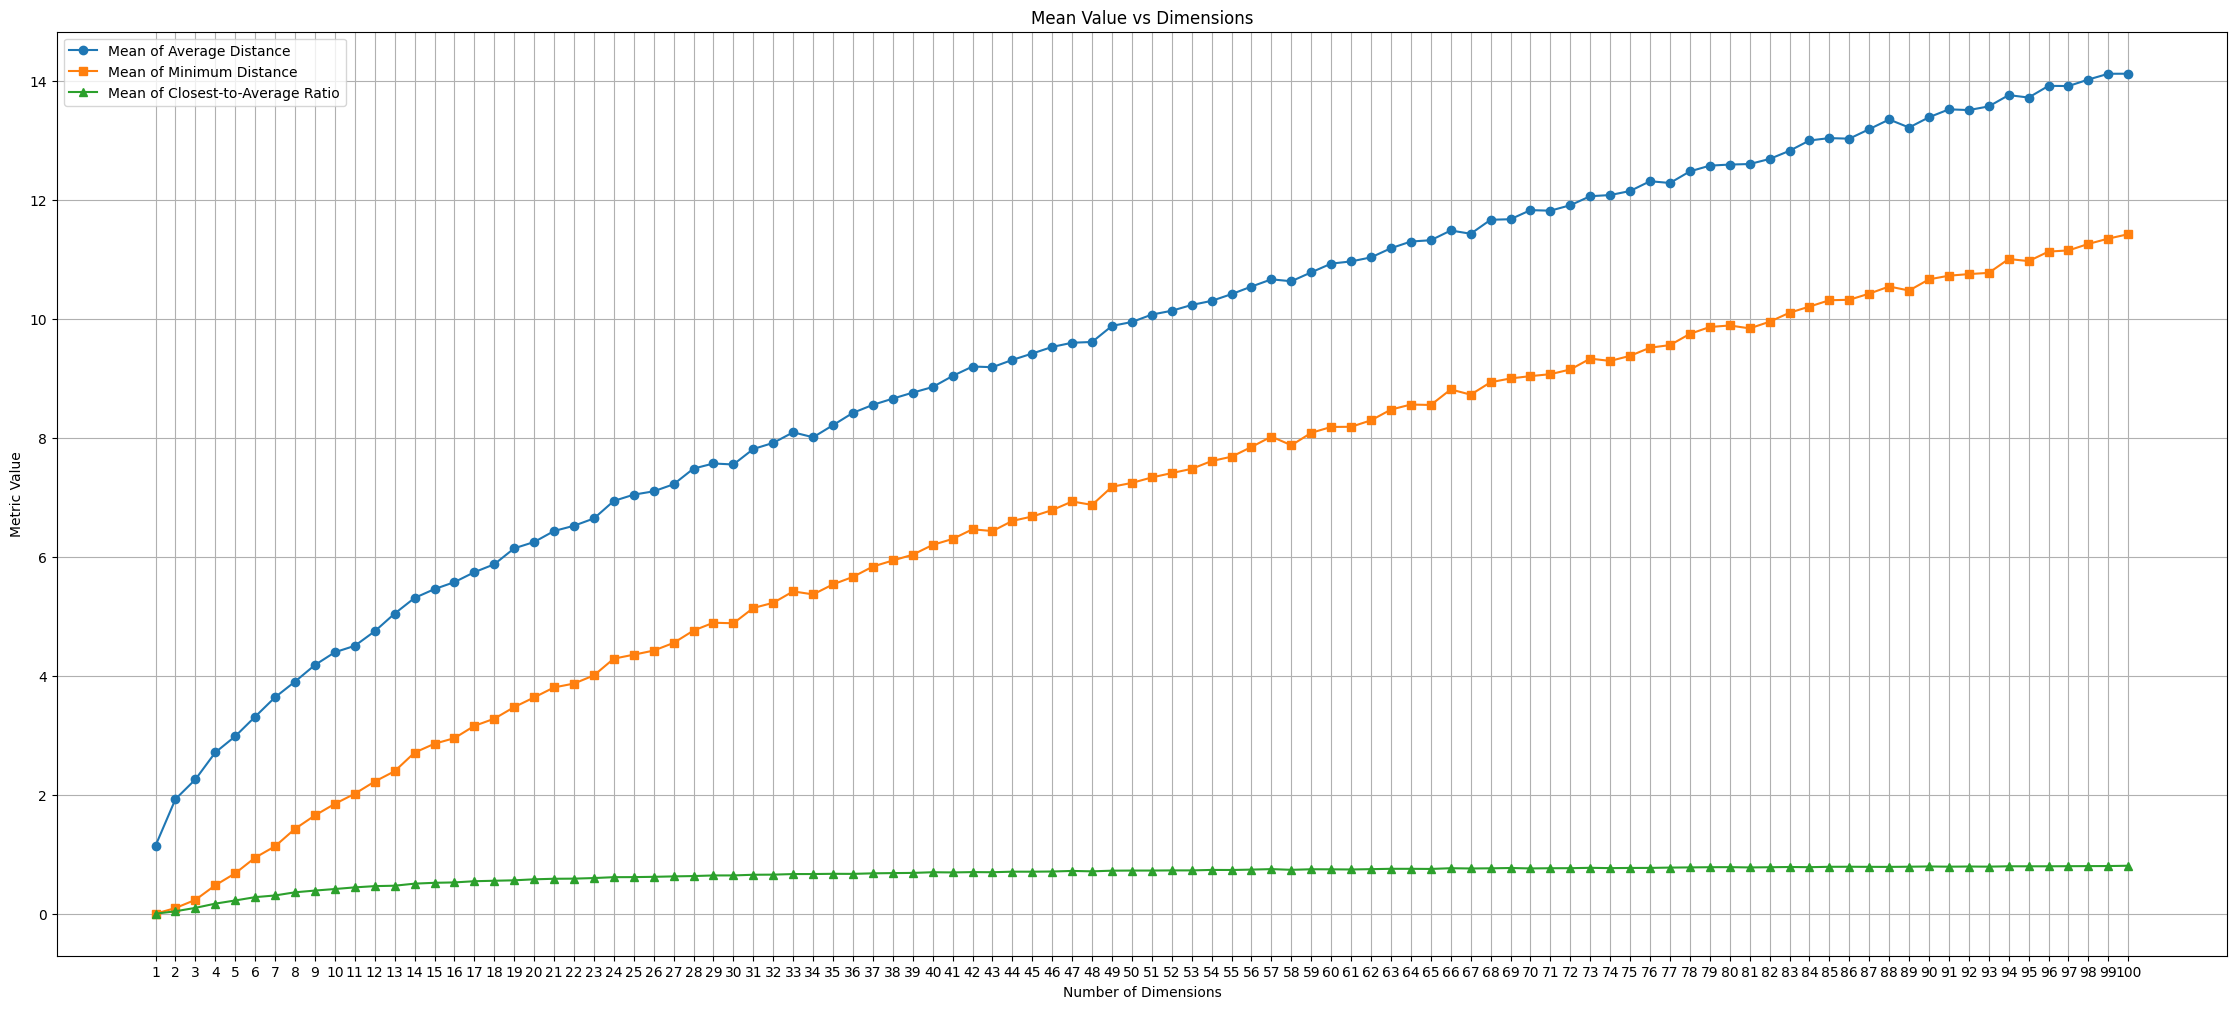

In [ ]:
dimensions = list(range(1, 101))

plt.figure(figsize=(28, 12))
plt.plot(dimensions, mean_of_average_distance, label='Mean of Average Distance', marker='o')
plt.plot(dimensions, mean_of_minimum_distance, label='Mean of Minimum Distance', marker='s')
plt.plot(dimensions, mean_of_closest_to_average_ratio_distance, label='Mean of Closest-to-Average Ratio', marker='^')

plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('Mean Value vs Dimensions')
plt.xticks(dimensions)
plt.legend()

plt.grid(True)
plt.show()

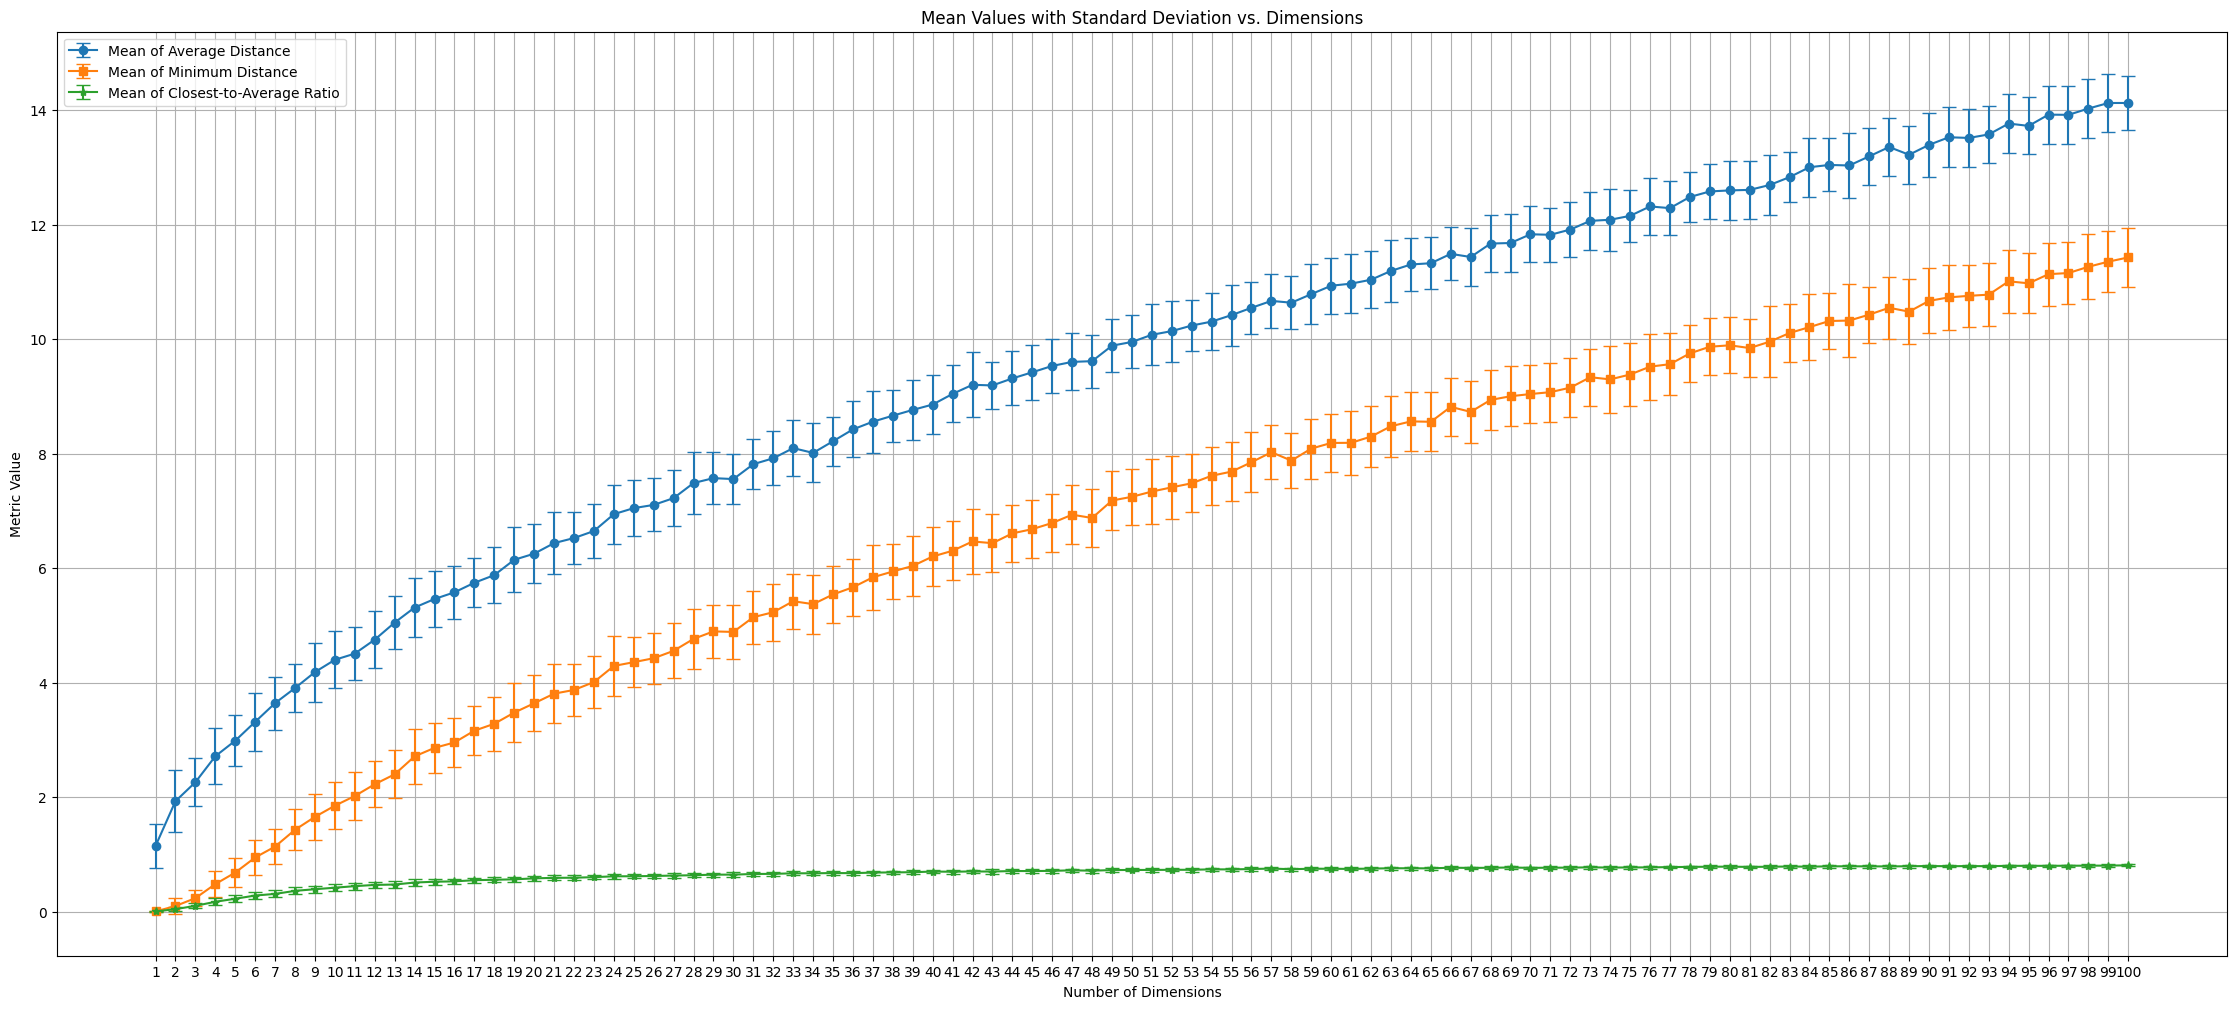

In [ ]:
plt.figure(figsize=(28, 12))
plt.errorbar(dimensions, mean_of_average_distance, yerr=std_of_average_distance,
             label='Mean of Average Distance', fmt='-o', capsize=5)
plt.errorbar(dimensions, mean_of_minimum_distance, yerr=std_of_minimum_distance,
             label='Mean of Minimum Distance', fmt='-s', capsize=5)
plt.errorbar(dimensions, mean_of_closest_to_average_ratio_distance, yerr=std_of_closest_to_average_ratio_distance,
             label='Mean of Closest-to-Average Ratio', fmt='-*', capsize=5)

plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('Mean Values with Standard Deviation vs. Dimensions')
plt.xticks(dimensions)
plt.legend()
plt.grid(True)
plt.show()

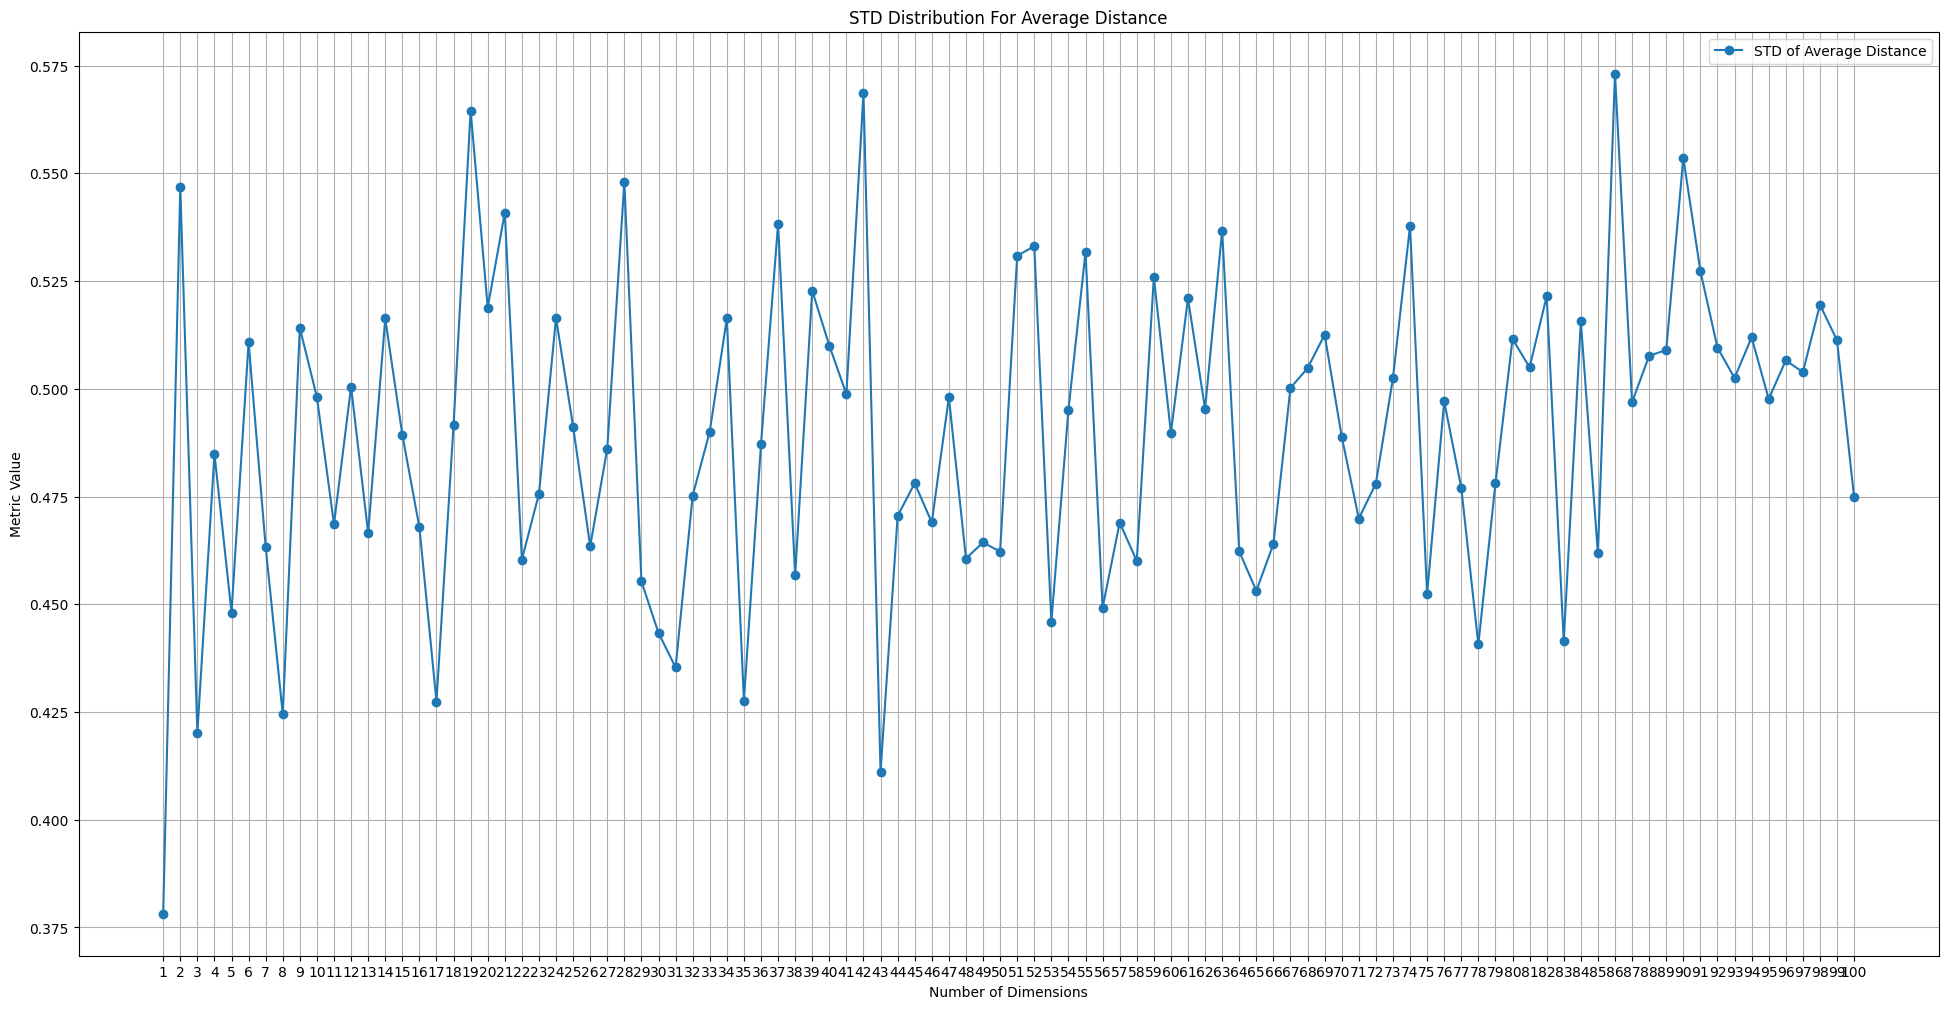

In [ ]:
dimensions = list(range(1, 101))

plt.figure(figsize=(24, 12))
plt.plot(dimensions, std_of_average_distance, label='STD of Average Distance', marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('STD Distribution For Average Distance')
plt.xticks(dimensions)
plt.legend()


plt.grid(True)
plt.show()

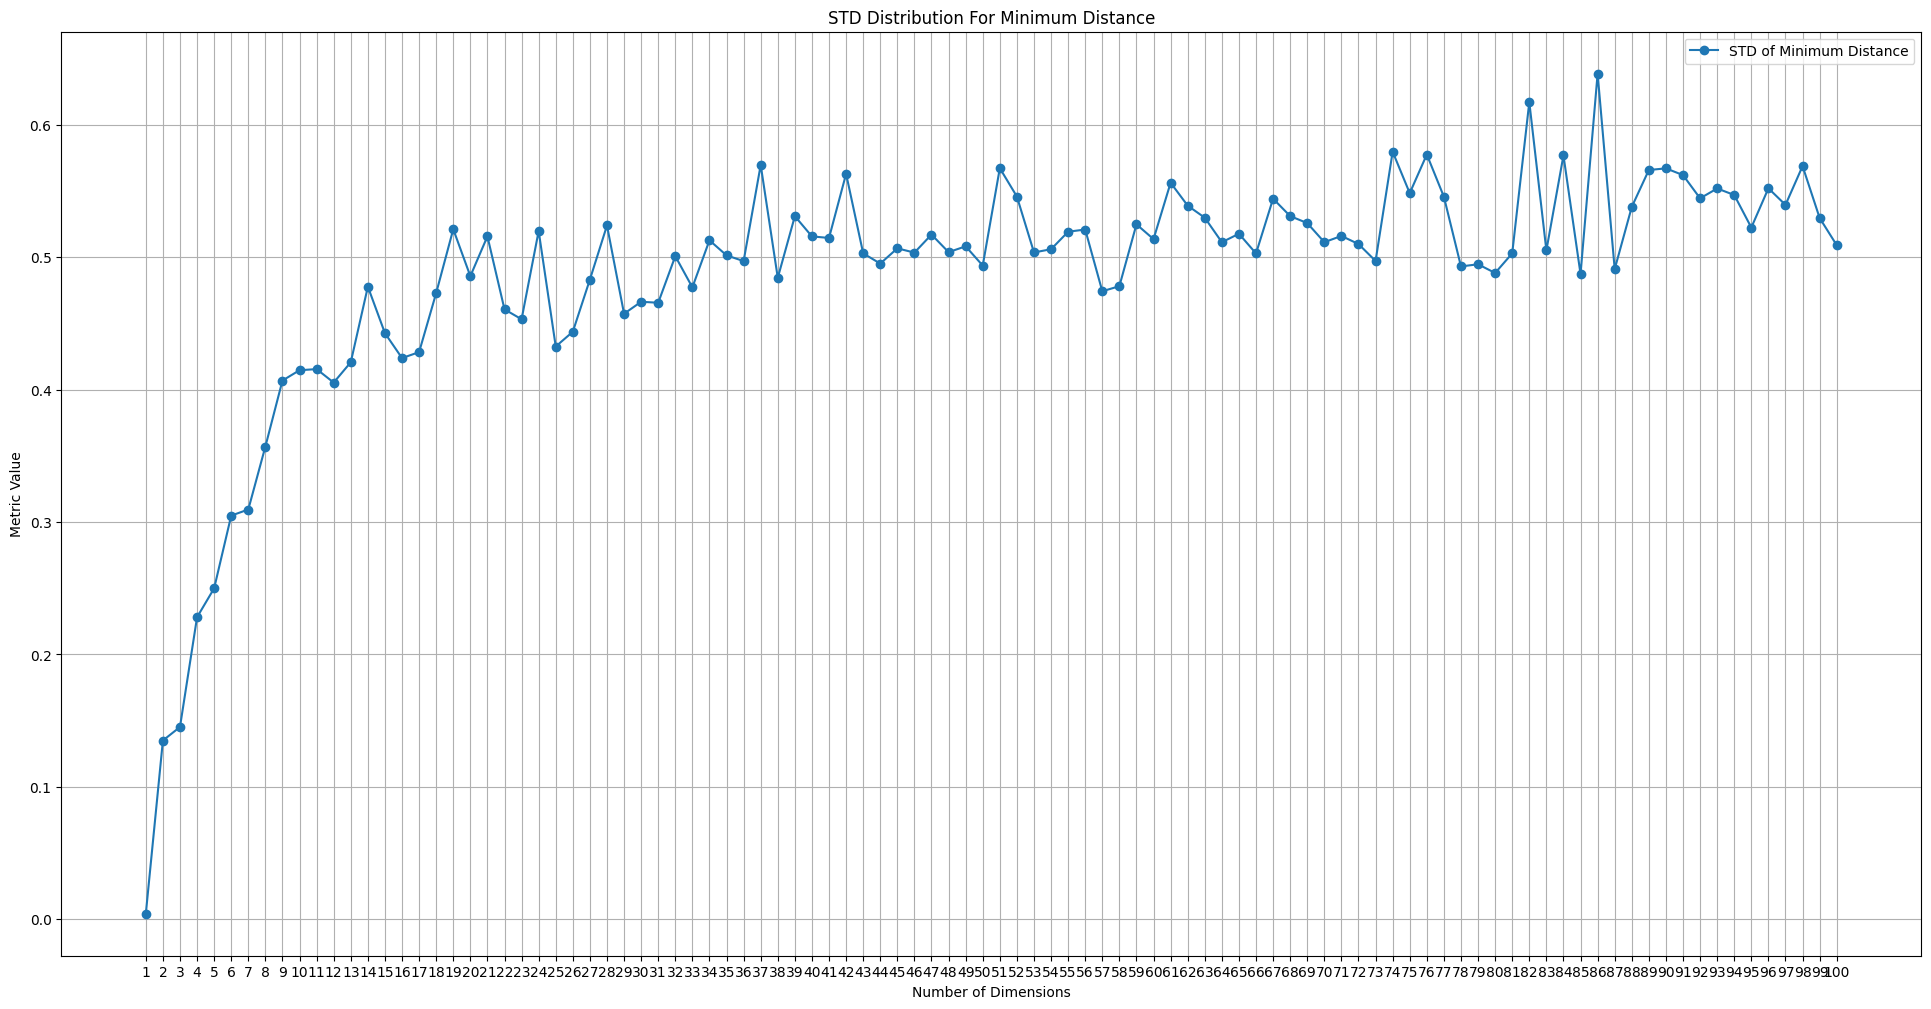

In [ ]:
dimensions = list(range(1, 101))

plt.figure(figsize=(24, 12))
plt.plot(dimensions, std_of_minimum_distance, label='STD of Minimum Distance', marker='o')

plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('STD Distribution For Minimum Distance')
plt.legend()

plt.grid(True)
plt.show()

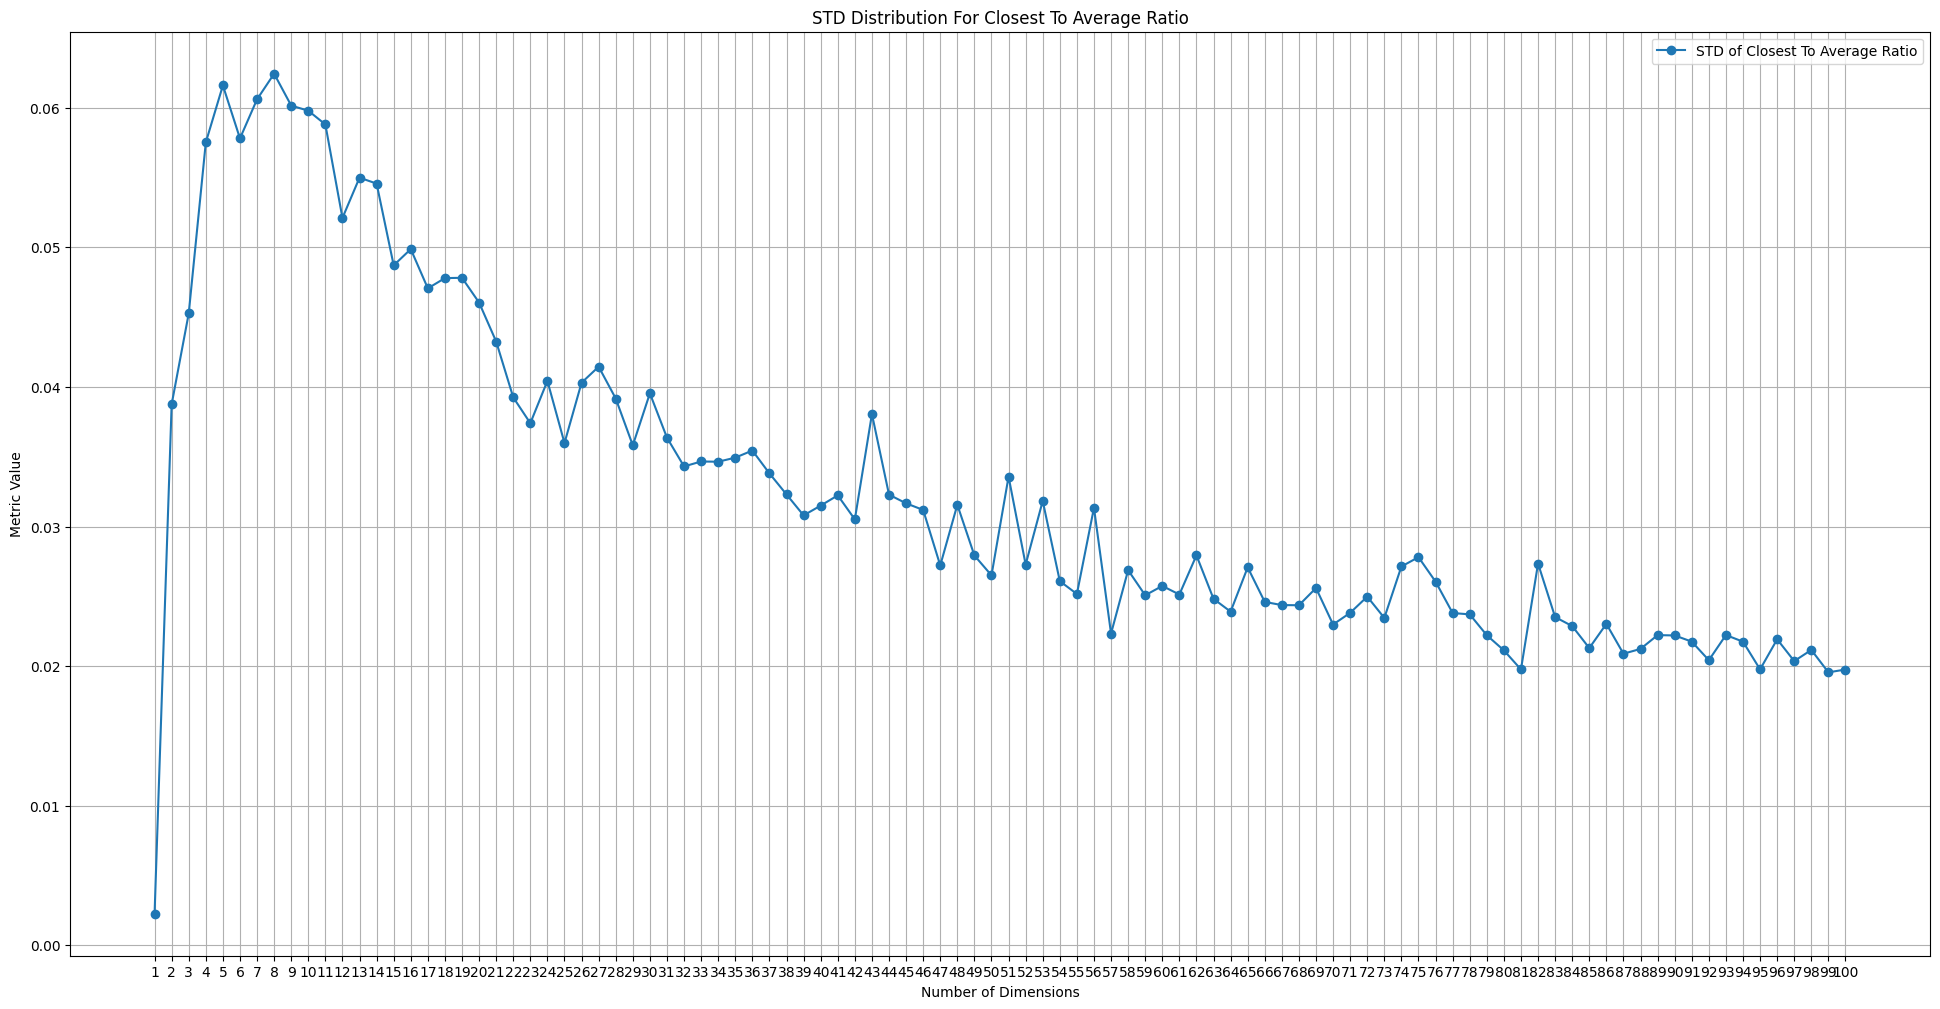

In [ ]:
dimensions = list(range(1, 101))

plt.figure(figsize=(24, 12))
plt.plot(dimensions, std_of_closest_to_average_ratio_distance, label='STD of Closest To Average Ratio', marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('STD Distribution For Closest To Average Ratio')
plt.xticks(dimensions)
plt.legend()


plt.grid(True)
plt.show()

#### 1.6.c Pairwise Distance Distribution

In [ ]:
def pairwise_distance(points): # It takes all pairs and stores the distance in list.
  list_of_distance = []
  for index1 in range(0,1000):
    for index2 in range(index1 + 1, 1000):
      distances = distance(points[index1], points[index2])
      list_of_distance.append(distances)
  return list_of_distance


In [ ]:
pairwise_distance_for_2D = pairwise_distance(all_points[1]) # For each dimensions I store points in a list
pairwise_distance_for_5D = pairwise_distance(all_points[4])
pairwise_distance_for_10D = pairwise_distance(all_points[9])
pairwise_distance_for_100D = pairwise_distance(all_points[99])

In [ ]:
print(len(pairwise_distance_for_2D))

499500


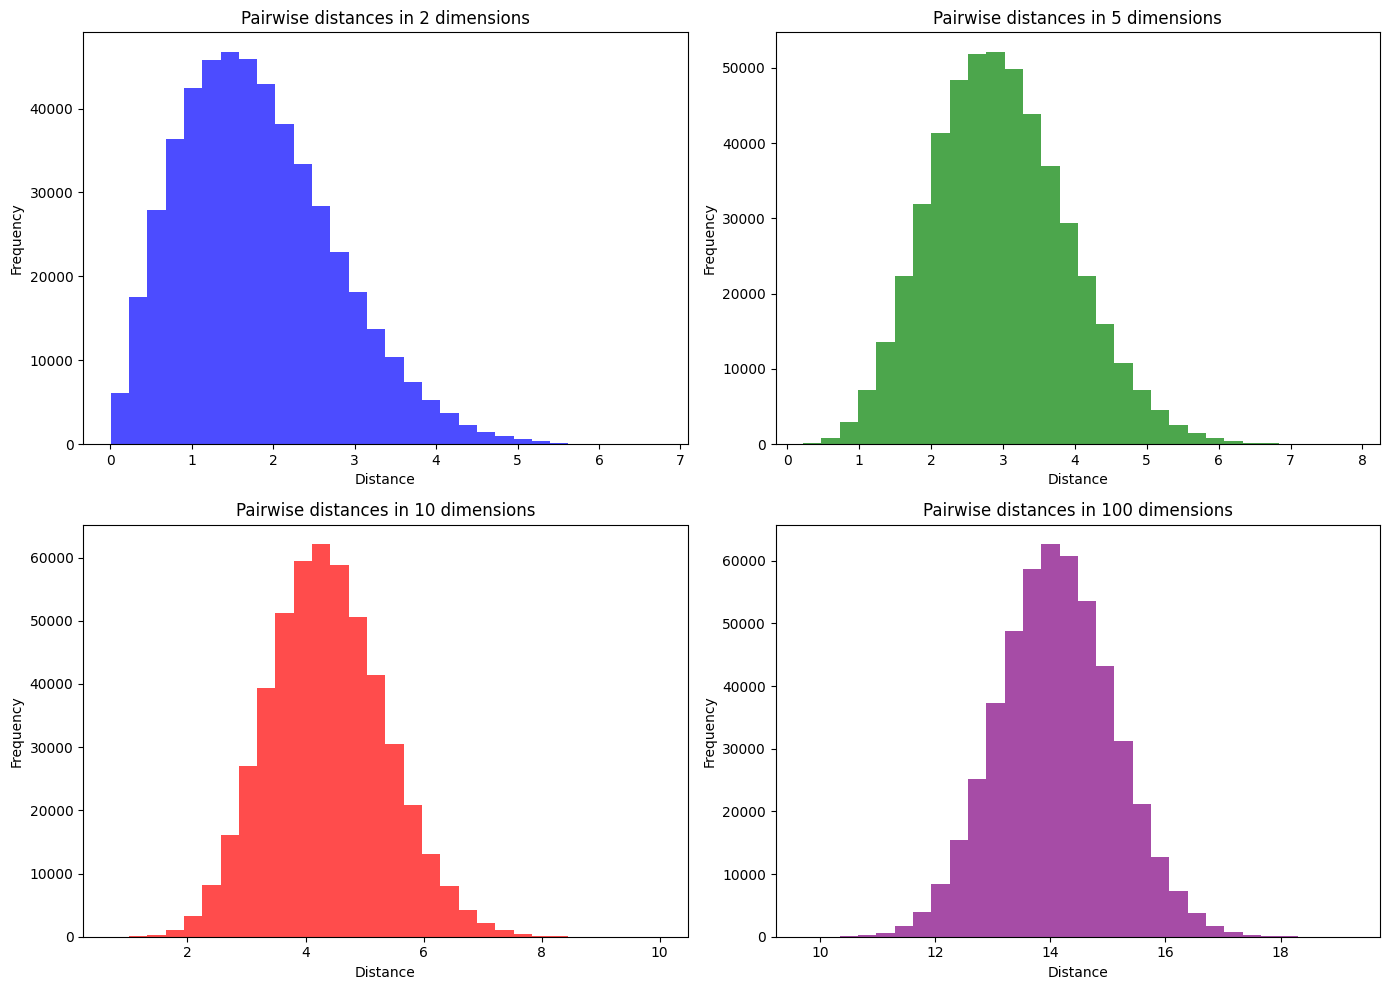

In [ ]:
# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for 2 dimensions
axs[0, 0].hist(pairwise_distance_for_2D, bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Pairwise distances in 2 dimensions')
axs[0, 0].set_xlabel('Distance')
axs[0, 0].set_ylabel('Frequency')

# Histogram for 5 dimensions
axs[0, 1].hist(pairwise_distance_for_5D, bins=30, color='green', alpha=0.7)
axs[0, 1].set_title('Pairwise distances in 5 dimensions')
axs[0, 1].set_xlabel('Distance')
axs[0, 1].set_ylabel('Frequency')

# Histogram for 10 dimensions
axs[1, 0].hist(pairwise_distance_for_10D, bins=30, color='red', alpha=0.7)
axs[1, 0].set_title('Pairwise distances in 10 dimensions')
axs[1, 0].set_xlabel('Distance')
axs[1, 0].set_ylabel('Frequency')

# Histogram for 100 dimensions
axs[1, 1].hist(pairwise_distance_for_100D, bins=30, color='purple', alpha=0.7)
axs[1, 1].set_title('Pairwise distances in 100 dimensions')
axs[1, 1].set_xlabel('Distance')
axs[1, 1].set_ylabel('Frequency')

# Layout adjustment
plt.tight_layout()
plt.show()

### 1.7 Discussion



1.   **Mean value vs Dimensions Relation:** As it can be seen in the Mean Value vs Dimensions graph (1. Graph), Mean of Average Distance and Mean of Minimum Distance are increasing obviously while dimension of points are increasing. For all dimensions Mean of Average Distance have higher metric value than other metrics. Mean of Closest-to-Average Ratio is also increasing by the increase in dimensionality but it is not obvious as the previous to metrics. From this graph, it can be interpreted that dimensionality has significant effect on increase in distance between the points. It also increase the minimum distance value.
****
2.   **STD Distribution for Average Distance:** In graph 3, we can observe the STD change with respect to change in dimension. There is no specific STD distribution. There is no pattern for the interpretation of the average distance. However, pick points are in the high dimensional points.
****
3.   **STD Distribution for Minimum Distance:** In graph 4, it can be observed that when the dimensionality increases the STD value is increases rapidly. It means for the specific points minimum distance will change. Minimum distances will be varied when the dimensionality increases.
****
4.   **STD Distribution for Closest To Average Ratio:** In graph 5, raito decreases when the dimensioanlity is increasing. It means that there is no variety in terms of ratio when the dimensionality increases. When the ratio decreases it can be hard to detect the nearest point to specified point. There will be many points that are close to specified point.
****
5.  **Pairwise Distance Histogram:** It shows the distance between all pairs. When the dimension increased, distance between all pairs also increases. Almost all distance values gathered in the same value. Therefore, all distance between all points interpreted as the same. It reduces the effect of classification because almost all point has the same distance from the selected point.

As a result, we tried to understand the "curse of dimensionality" in this part because when the dimension of the point increased, distance between points will increase and the frequency of the distance values will be higher. Therefore, algorithms that tries to find the closest point will tend to be failed. Because of the higher dimensionality distance will be more misleading.





## 2- k-NN Classifier In Action

In [ ]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

### 2.1 Dataset


In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# look at the range of values the images in the training set take
print('Range of values in the training set: ', [X_train.min(), X_train.max()])

Range of values in the training set:  [0, 255]


In [ ]:
# how many classes are there in MNIST?
#TAKEN FROM RECITATION CODES
num_classes = len(np.unique(y_train)) # get the count of unique labels

# how many samples from each class are there in the training set?
for i in range(num_classes):
  num_samples_i = (y_train == i).sum()
  print('There are {} samples from class {}'.format(num_samples_i, i))

There are 6000 samples from class 0
There are 6000 samples from class 1
There are 6000 samples from class 2
There are 6000 samples from class 3
There are 6000 samples from class 4
There are 6000 samples from class 5
There are 6000 samples from class 6
There are 6000 samples from class 7
There are 6000 samples from class 8
There are 6000 samples from class 9


### 2.2 Visualization

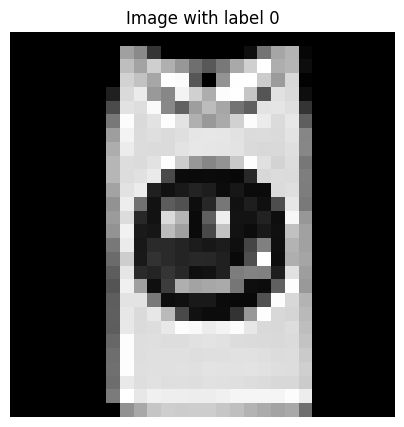

In [ ]:
#TAKEN FROM RECITATION CODES
idx = 101 # pick by index
image, label = X_train[idx], y_train[idx]

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Image with label {}'.format(label))
plt.axis('off')
plt.show()

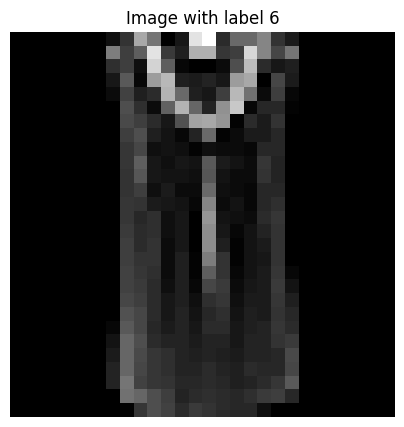

In [ ]:
# visualize some of the samples - 2
#TAKEN FROM RECITATION CODES
class_label = 6 # randomly pick based on class_label -> run this cell multiple times
num_samples_i = (y_train == class_label).sum()

rand_idx = np.random.randint(low=0, high=num_samples_i)
image, label = X_train[y_train == class_label][rand_idx], y_train[y_train == class_label][rand_idx]

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Image with label {}'.format(label))
plt.axis('off')
plt.show()

In [ ]:
'''
# visualize other things you wish, example: the avg. image of each class
class_label = 1
#TAKEN FROM RECITATION CODES
# take the mean across axis 0 (across the samples).
mean_image_for_class = X_train[y_train == class_label].mean(axis=0)

plt.figure(figsize=(5, 5))
plt.imshow(mean_image_for_class, cmap='gray')
plt.title('Avg. image of class {}'.format(class_label))
plt.axis('off')
plt.show()
'''

"\n# visualize other things you wish, example: the avg. image of each class\nclass_label = 1\n#TAKEN FROM RECITATION CODES\n# take the mean across axis 0 (across the samples).\nmean_image_for_class = X_train[y_train == class_label].mean(axis=0)\n\nplt.figure(figsize=(5, 5))\nplt.imshow(mean_image_for_class, cmap='gray')\nplt.title('Avg. image of class {}'.format(class_label))\nplt.axis('off')\nplt.show()\n"

### Data Shape

In [ ]:
#TAKEN FROM RECITATION CODES
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2])

In [ ]:
X_test.shape

(10000, 784)

### Data Split

In [ ]:
#TAKEN FROM RECITATION CODES
X_training, X_val, y_training, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)
print(X_training.shape, X_val.shape, y_training.shape, y_val.shape)

(48000, 784) (12000, 784) (48000,) (12000,)


### k-NN Training

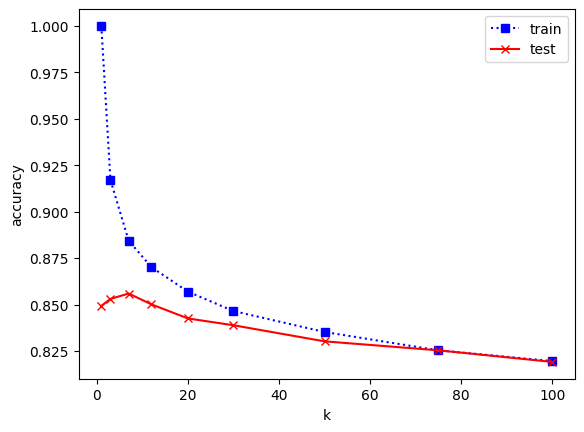

In [ ]:
#TAKEN FROM RECITATION CODES
# plot train acc and test acc with different k
ks = [1, 3, 7, 12, 20, 30, 50, 75, 100]
train_errs = []
test_errs = []
for k in ks:
    knn = KNN(n_neighbors=k)
    knn.fit(X_training, y_training)
    train_errs.append(knn.score(X_training, y_training))
    test_errs.append(knn.score(X_val, y_val))
plt.figure()
plt.plot(ks, train_errs, "bs:", label="train")
plt.plot(ks, test_errs, "rx-", label="test")
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

The best result is taken when k = 7 because test graph picked when k=7.


### Combining Validation Data with Training Data

In [ ]:
#TAKEN FROM RECITATION CODES
X_combined = np.concatenate([X_training, X_val], axis=0)
y_combined = np.concatenate([y_training, y_val], axis=0)

In [ ]:
X_combined.shape

(60000, 784)

### Training with all data

In [ ]:
#TAKEN FROM RECITATION CODES
# Fit the data to a KNN model with k=7
k = 7
knn = KNN(n_neighbors=k)
knn.fit(X_combined, y_combined)
y_pred = knn.predict(X_test)
val_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Validation accuracy of KNN with k={}: {:.3f}'.format(k, val_acc))

Validation accuracy of KNN with k=7: 0.854


### Confusion Matrix and Images that are predicted wrongly

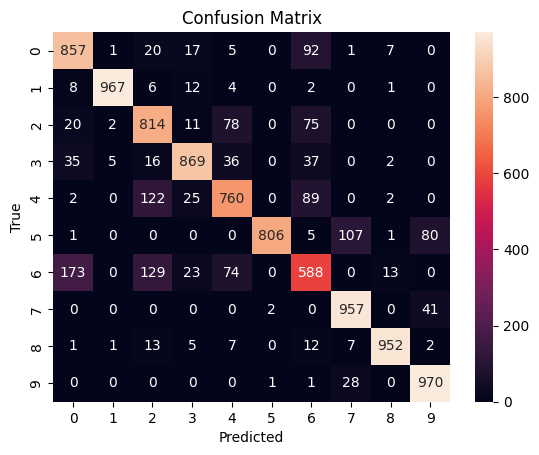

In [ ]:
#TAKEN FROM RECITATION CODES
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The most problematic feature is shirt (6) because t-shirt, coat and pullover are very similar to shirt and model cannot handle the correct feature well. These classes characteristics are very similar to each other. For the Sandal (5) there are very similar problem. Model cannot handle the difference between sandal, sneaker and ankle boat. As you can guess, some of the products have the similar structure so model can confuse about these models. For instance t-shirt, shirt and pullpver almost have the same structure.